In [1]:
import numpy as np
import pandas as pd

###`Q-1:` Write a program to create an empty series.

In [3]:
# code here
ser = pd.Series([])
type(ser)

pandas.core.series.Series

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [4]:
# code here
ser1 = pd.Series([1, 2, 3, 4])
ser2 = pd.Series([1, 2, 3, 4])
print(ser1+ser2)
print(ser1 - ser2)
print(ser1 * ser2)
print(ser1/ser2)

0    2
1    4
2    6
3    8
dtype: int64
0    0
1    0
2    0
3    0
dtype: int64
0     1
1     4
2     9
3    16
dtype: int64
0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64


###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [ ]:
# code here

###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [6]:
# code here
series = pd.Series([1,2,'Python', 2.0, True, 100])
pd.to_numeric(series,errors = 'coerce')

,0
0,1.0
1,2.0
2,NaN
3,2.0
4,1.0
5,100.0


Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

In [10]:
ser = pd.read_csv('/batsman_runs_series.csv', index_col= 'batter').squeeze('columns')
ser

,batsman_run
batter,
A Ashish Reddy,280
A Badoni,161
A Chandila,4
A Chopra,53
A Choudhary,25
...,...
Yash Dayal,0
Yashpal Singh,47
Younis Khan,3


###`Q-6` Find top 10 most run getter from the series.

In [23]:
# code here
ser.sort_values(ascending = False).head(10).index

Index(['V Kohli', 'S Dhawan', 'DA Warner', 'RG Sharma', 'SK Raina',
       'AB de Villiers', 'CH Gayle', 'MS Dhoni', 'RV Uthappa', 'KD Karthik'],
      dtype='object', name='batter')

###`Q-7` No of players having runs above 3000

In [27]:
# code here
ser[ser > 3000].size

20

###`Q-8` No of players having runs above mean value?

In [31]:
# code here
ser[ser > ser.mean()].size

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [61]:
# code here
items = pd.read_csv('/items.csv', index_col = 'item_name').squeeze('columns')
items

,item_price
item_name,
Chips and Fresh Tomato Salsa,$2.39
Izze,$3.39
Nantucket Nectar,$3.39
Chips and Tomatillo-Green Chili Salsa,$2.39
Chicken Bowl,$16.98
...,...
Steak Burrito,$11.75
Steak Burrito,$11.75
Chicken Salad Bowl,$11.25


In [41]:
items.isnull().sum()

np.int64(50)

In [64]:
items = pd.to_numeric(items.str[1:])

In [66]:
items = items * 90
items

,item_price
item_name,
Chips and Fresh Tomato Salsa,215.1
Izze,305.1
Nantucket Nectar,305.1
Chips and Tomatillo-Green Chili Salsa,215.1
Chicken Bowl,1528.2
...,...
Steak Burrito,1057.5
Steak Burrito,1057.5
Chicken Salad Bowl,1012.5


In [70]:
items.fillna(items.mean(), inplace = True)

In [71]:
items[items.isnull()]

,item_price
item_name,


###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [72]:
# code here
items.mean()

np.float64(671.6728346456694)

In [77]:
items.quantile(0.3)

np.float64(400.5)

In [85]:
items[items.between(1000, 2000)].count()

np.int64(972)

In [87]:
items.max()

3982.5

<Axes: ylabel='Frequency'>

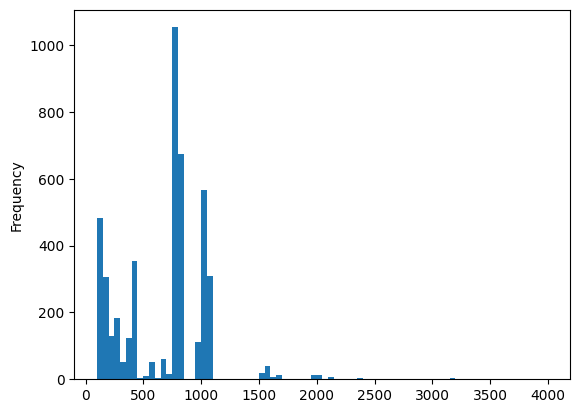

In [88]:
bins = np.arange(items.min(), items.max() + 50, 50)
items.plot(kind = 'hist', bins = bins)